# Pratical Data Science Assignment 2
## Predicting The Death event from heart failure:
### Karan Pradhan(s3814520) and Shashwot Karki(s3801123)

## Introduction
The following data manipulation is done to the Heart failure clinical records Data Set as we aim to understand the diffrent variables that cause Heart failure and how much of them maybe more impactful than others.

To determine the impact of diffent variables such as age and sex in causing heart failure we will be using machine learning models as well as data exploration techniques such as histograms and pie charts.

## Abstract
- The objective of this project is to predict weather the variable DEATH_EVENT is influenced by variables such as age and gender and investigate the following hypothesis:
- People who suffer from anemia and ejection fractionn are likey to have died
- How does smoking impact DEATH_EVENT

The Heart failure clinical records Data Set was obtained from the UCL Machine Learning Repository.

## Data Retreving and Preparation
Before we can begin we must clean up the dataset to get it into a compatible format for the regression model. This involves removing invalid rows, one-hot-encoding categorical variables and converting to appropriate data types.

### Importing Libraries and the Dataset

Before we can do any processing with the dataset we must import the necesary libraries we will be using.




In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import random
import math
import statsmodels.api as sm


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn import preprocessing
from sklearn import tree

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# import pydotplus

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# Data Retriving and Preparation:

In [2]:
data_set = pd.read_csv("heart_failure_clinical_records_dataset.csv")
 # take a copy of the data set
df=data_set.copy();
#To verify that the dataset has been imported as needed we display a random sample:
df.sample(10, random_state=23)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
184,58.0,1,145,0,25,0,219000.00,1.20,137,1,1,170,1
110,85.0,0,129,0,60,0,306000.00,1.20,132,1,1,90,1
159,59.0,1,129,0,45,1,362000.00,1.10,139,1,1,121,0
221,65.0,0,118,0,50,0,194000.00,1.10,145,1,1,200,0
14,49.0,1,80,0,30,1,427000.00,1.00,138,0,0,12,0
140,80.0,0,805,0,38,0,263358.03,1.10,134,1,0,109,1
44,60.0,1,588,1,60,0,194000.00,1.10,142,0,0,33,1
69,65.0,0,113,1,25,0,497000.00,1.83,135,1,0,67,1
143,61.0,1,84,0,40,1,229000.00,0.90,141,0,0,110,0
137,68.0,1,646,0,25,0,305000.00,2.10,130,1,0,108,0


From this we can see the names of the columns in the dataset. To make some tasks later on easier we will create a list of the names of the categorical features.

###### Sex - Gender of patient: Male = 1, Female =0
###### Diabetes - 1 = Yes, 0 = No
###### Anaemia - 1 = Yes, 0 = No
###### High_blood_pressure - 1 = Yes, 0 = No
###### Smoking - 1 = Yes, 0 = No
###### DEATH_EVENT - 1 = Yes, 0 = No

In [3]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [4]:
#data types of the attributes
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [5]:
#  Returns tuple of shape (Rows, columns) of dataframe/series
df.shape

(299, 13)

In [6]:
#column names
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [7]:
categorical_column_names = df.columns[df.dtypes==object].tolist()

#### Removing Invalid Rows
The first step in data preparation is to remove any invalid rows from the dataset. We begin by first checking how many empty values exist in the dataset.

In [8]:
print("Number of missing values by feature:")
print(df.isnull().sum())

Number of missing values by feature:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [9]:
#duplicates removal
df = df.drop_duplicates()
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [10]:
df.shape

(299, 13)

From this we can see that there are no missing values.

The next step is to look for any invalid values. This includes negative ages, negative charges, misspelled categories etc. The method for checking validity changes for each data type.

In [11]:
# For the categorical features we simply display the unique values in each field.
# This will pick up any odd categories or mispellings.
for name in categorical_column_names:
  print("\nUnique values in " + name)
  print(df[name].unique())

# To check the numeric features we ensure that none of the values are negative.
# None of the numeric features of our dataset are valid if they are negative.
for name in df.columns:
  if name not in categorical_column_names:
    print("\nNumber of negative values in " + name)
    print(df[df[name] < 0].size)


Number of negative values in age
0

Number of negative values in anaemia
0

Number of negative values in creatinine_phosphokinase
0

Number of negative values in diabetes
0

Number of negative values in ejection_fraction
0

Number of negative values in high_blood_pressure
0

Number of negative values in platelets
0

Number of negative values in serum_creatinine
0

Number of negative values in serum_sodium
0

Number of negative values in sex
0

Number of negative values in smoking
0

Number of negative values in time
0

Number of negative values in DEATH_EVENT
0


We can then see that none of the rows in this data set are invalid and so no rows need to be removed.



In [12]:
#select instances 
dfInstances = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]
dfInstances.sample(5, random_state=23)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
184,58.0,1,145,0,25,0,219000.0,1.2,137,1,1,170
110,85.0,0,129,0,60,0,306000.0,1.2,132,1,1,90
159,59.0,1,129,0,45,1,362000.0,1.1,139,1,1,121
221,65.0,0,118,0,50,0,194000.0,1.1,145,1,1,200
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12


In [13]:
#select the target class label
dfTarget = df['DEATH_EVENT']
dfTarget.sample(5, random_state=23)

184    1
110    1
159    0
221    0
14     0
Name: DEATH_EVENT, dtype: int64

## Data Exploration
 
### Univariate Visualisation

And that's our clean dataset. We can now proceed with our exploration of the data.

## Age:

<Figure size 504x360 with 0 Axes>

Text(0.5, 1.0, 'Figure 1. Box Plot of Age')

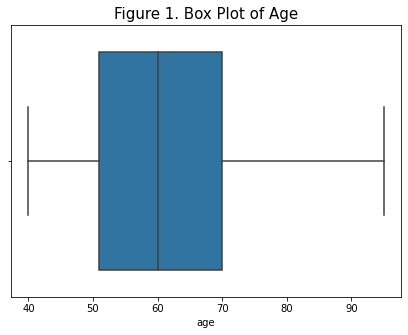

<Figure size 1800x720 with 0 Axes>

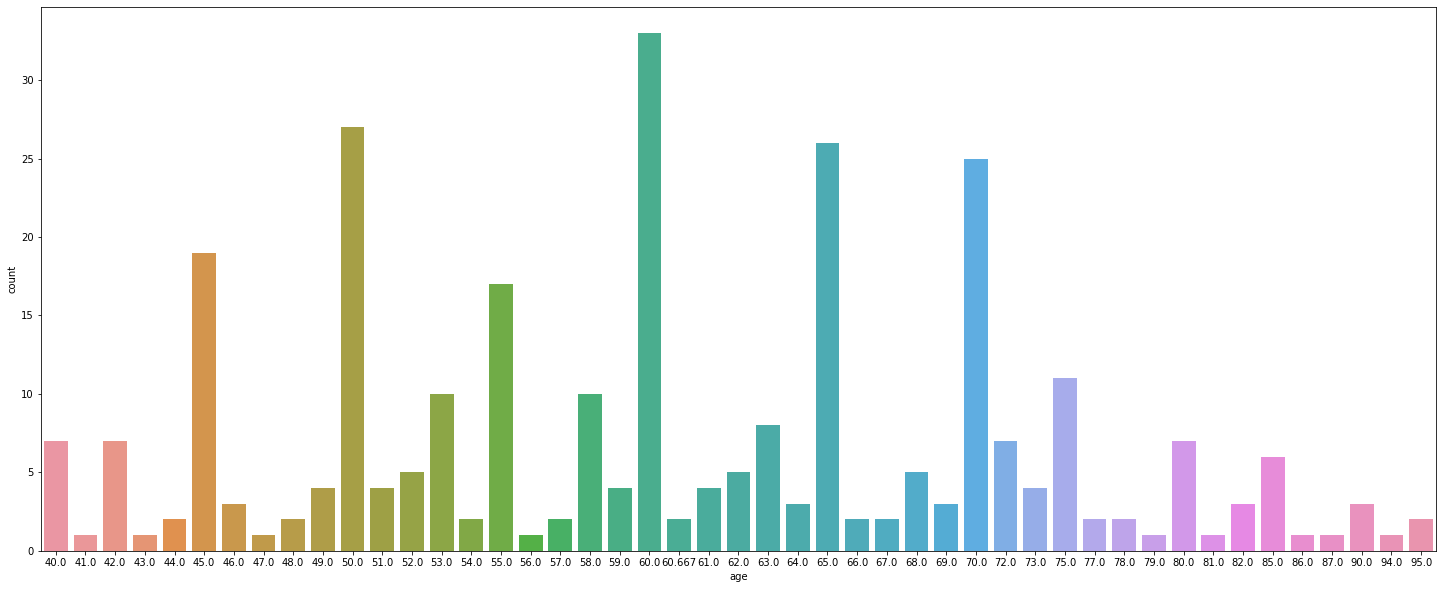

In [14]:
# # get a box plot of age
plt.figure(figsize=(7,5))
sns.boxplot(df['age']).set_title('Figure 1. Box Plot of Age', fontsize = 15)
plt.show()

plt.figure(figsize=(25,10))
sns.countplot(x='age',data=df)
plt.show()

## Anemia:

<Figure size 504x504 with 0 Axes>

Text(0.5, 1.0, 'Figure 1: Data distribution of Anaemia values')

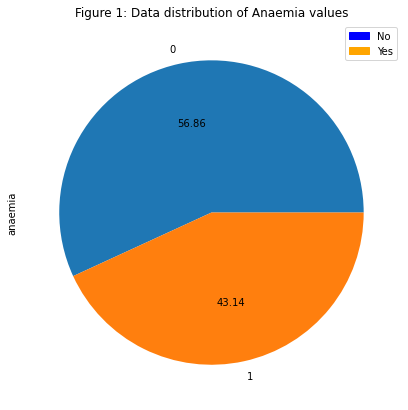

In [15]:
import matplotlib.patches as mpatches
plt.figure(figsize=(7,7))
df['anaemia'].value_counts().plot(kind='pie',autopct='%.2f')
blue_patch = mpatches.Patch(color='blue', label='No')
orange_patch = mpatches.Patch(color='orange', label='Yes')
plt.legend(handles=[blue_patch, orange_patch])
plt.title("Figure 1: Data distribution of Anaemia values")
plt.show()

From the above plot we can see that a significant porportion of the sample porportion suffers from anaemia.

## Creatinine phosphokinase:

<Figure size 504x360 with 0 Axes>

(array([184.,  81.,   8.,  10.,   6.,   3.,   0.,   2.,   1.,   1.,   0.,
          1.,   0.,   0.,   2.]),
 array([  23.        ,  545.53333333, 1068.06666667, 1590.6       ,
        2113.13333333, 2635.66666667, 3158.2       , 3680.73333333,
        4203.26666667, 4725.8       , 5248.33333333, 5770.86666667,
        6293.4       , 6815.93333333, 7338.46666667, 7861.        ]),
 <a list of 15 Patch objects>)

Text(0.5, 1.0, 'Figure 2. Histogram of creatinine phosphokinase')

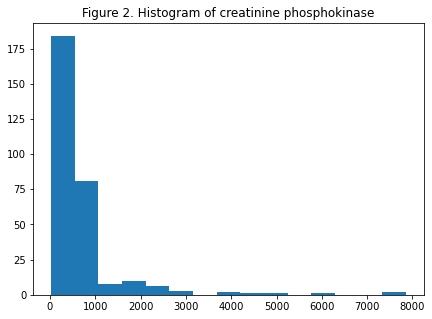

In [16]:
plt.figure(figsize=(7,5))
plt.hist(df['creatinine_phosphokinase'],bins=15)
plt.title("Figure 2. Histogram of creatinine phosphokinase")
plt.show()


From the above histogram of creatinine phosphokinase we can see that for the majority of the sample poroprtion the value is between 0-500 which is not very promising as a noraml creatinine phosphokinase range si considered to be between 10-120



```
# This is formatted as code
```

# Ejection fraction:

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'Figure 3: Boxplot of Ejection Fraction')

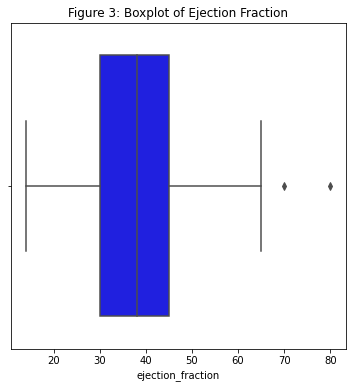

In [17]:
# Boxplot for ejection_fraction 
plt.figure(figsize=(6,6))
sns.boxplot(x = df.ejection_fraction, color = 'blue')
plt.title("Figure 3: Boxplot of Ejection Fraction")

plt.show()

From the above box plot of ejection fraction we can see that the median ejection fraction for the patients is around 38 which is much lower than the normal range which is between 50 to 70 percent

# Serum creatinine:

The normal range for serum creatinine is different between men and women thus we will create two seperate box plots.

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'Figure 4: Boxplot of Serum creatinine')

(0.1, 5.0)

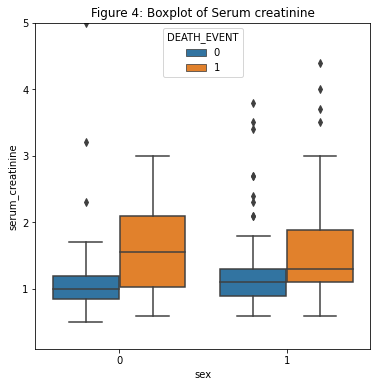

count    299.00000
mean       1.39388
std        1.03451
min        0.50000
25%        0.90000
50%        1.10000
75%        1.40000
max        9.40000
Name: serum_creatinine, dtype: float64

In [18]:
# Boxplot for serum creatinine
plt.figure(figsize=(6,6))
sns.boxplot(x=df.sex, y=df.serum_creatinine, hue=df.DEATH_EVENT)
plt.title("Figure 4: Boxplot of Serum creatinine")
plt.ylim(0.1,5)
plt.show()
df['serum_creatinine'].describe()

From the above box plot of serum creatinine we can see that the average level of serum ceratinine for womean was around 1 while for men it was closer to 1.2. Both of these values are fine as the normal range of serum creatinine for women is 0.59 to 1.04 while for men it is between 0.75 to 1.34. But from the box plot we can also see that both datasets have numerous outliers which are likely going to correspond with DEATH_EVENT

*italicised text*# Serum sodium:

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'Figure 5: Boxplot of Serum sodium')

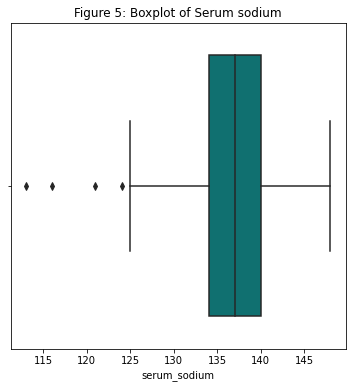

In [19]:
plt.figure(figsize=(6,6))

sns.boxplot(x=df.serum_sodium, color = 'teal')
plt.title("Figure 5: Boxplot of Serum sodium")
plt.show()

From the above box plot we can see that the mean level of serum_sodium for the patients was around 137.5 which falls right in normal range which is between 135 and 145.

When we deal with outliers we need to be carefull and have some insight on the outliers of the given dataset.Outliers can be kept or removed but again removing outliers without a good reason will decrease our accuracy.

Hence after a little research we can see that all the values are all possible ranges of the values, hence they are not specifically outliers but actual data which can help us in predicting our model.

# Sex:

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'Figure 6: Pie Chart of Sex distribution')

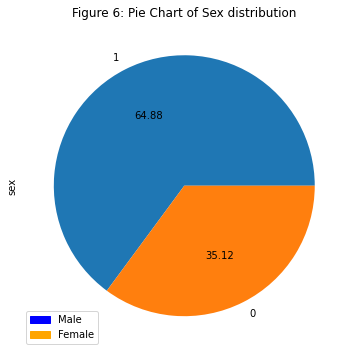

In [20]:

import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
df['sex'].value_counts().plot(kind='pie',autopct='%.2f')
blue_patch = mpatches.Patch(color='blue', label='Male')
orange_patch = mpatches.Patch(color='orange', label='Female')
plt.legend(handles=[blue_patch, orange_patch])
plt.title("Figure 6: Pie Chart of Sex distribution")
plt.show()

From the above pie chart we can observe that a majority of the population is made up of men. The ratio between men and women is nearly 2:1 which is quite astounding.

# Diabetes:

<Figure size 504x504 with 0 Axes>

Text(0.5, 1.0, 'Figure 7: Pie Chart of diabetes distribution')

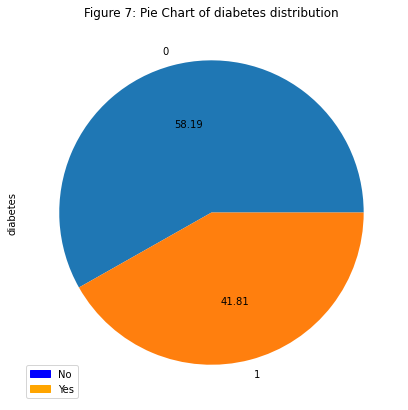

In [21]:
plt.figure(figsize=(7,7))
df['diabetes'].value_counts().plot(kind='pie',autopct='%.2f')
blue_patch = mpatches.Patch(color='blue', label='No')
orange_patch = mpatches.Patch(color='orange', label='Yes')
plt.legend(handles=[blue_patch, orange_patch])
plt.title("Figure 7: Pie Chart of diabetes distribution")
plt.show()

# High blood pressure:

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'Figure 8: Boxplot of High Blood Pressure')

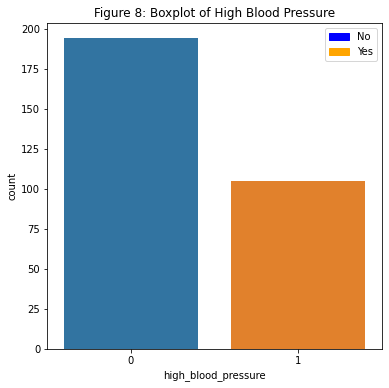

In [22]:
plt.figure(figsize=(6,6))
sns.countplot(x='high_blood_pressure',data=df)
blue_patch = mpatches.Patch(color='blue', label='No')
orange_patch = mpatches.Patch(color='orange', label='Yes')
plt.legend(handles=[blue_patch, orange_patch])
plt.title("Figure 8: Boxplot of High Blood Pressure")
plt.show()

# Platelets:

<Figure size 504x360 with 0 Axes>

(array([  9.,  46., 136.,  67.,  27.,   9.,   2.,   1.,   1.,   1.]),
 array([ 25100., 107590., 190080., 272570., 355060., 437550., 520040.,
        602530., 685020., 767510., 850000.]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'Figure 9: Histogram of Patelets')

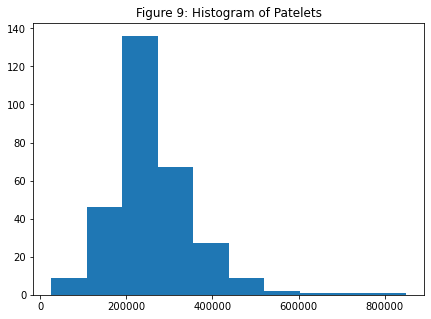

In [23]:
plt.figure(figsize=(7,5))
plt.hist(df['platelets'])
plt.title("Figure 9: Histogram of Patelets")
plt.show()

# Smoking:

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, 'Figure 10: Pie Chart of Smoking')

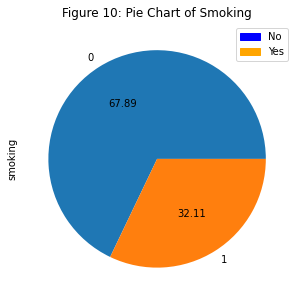

In [24]:
plt.figure(figsize=(5,5))
df['smoking'].value_counts().plot(kind='pie',autopct='%.2f')
blue_patch = mpatches.Patch(color='blue', label='No')
orange_patch = mpatches.Patch(color='orange', label='Yes')
plt.legend(handles=[blue_patch, orange_patch])
plt.title("Figure 10: Pie Chart of Smoking")
plt.show()

# Time:

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'Figure 11: Box Plot of Time distribution')

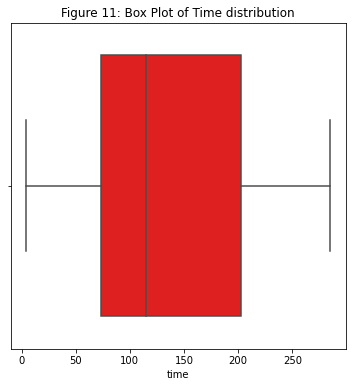

In [25]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df.time, color = 'red')
plt.title("Figure 11: Box Plot of Time distribution")
plt.show()


# Death Event:

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'Figure 12: Box Plot of DEATH_EVENT')

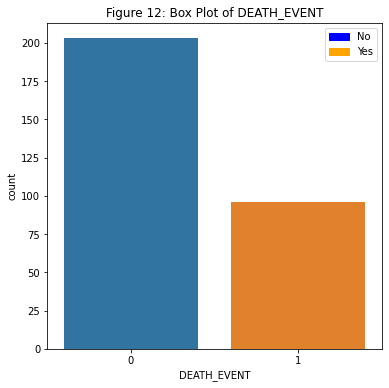

In [26]:
plt.figure(figsize=(6,6))
sns.countplot(x='DEATH_EVENT',data=df)
blue_patch = mpatches.Patch(color='blue', label='No')
orange_patch = mpatches.Patch(color='orange', label='Yes')
plt.legend(handles=[blue_patch, orange_patch])
plt.title("Figure 12: Box Plot of DEATH_EVENT")
plt.show()

<Figure size 432x432 with 0 Axes>

Text(0, 0.5, 'DEATH_EVENT')

Text(0.5, 1.0, 'Figure 13: Box Plot of DEATH_EVENT vs Sex')

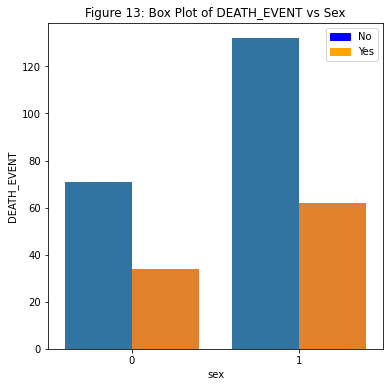

In [27]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',hue='DEATH_EVENT',data=df)
plt.ylabel('DEATH_EVENT')
blue_patch = mpatches.Patch(color='blue', label='No')
orange_patch = mpatches.Patch(color='orange', label='Yes')
plt.legend(handles=[blue_patch, orange_patch])
plt.title("Figure 13: Box Plot of DEATH_EVENT vs Sex")
#plt.legend(['no','yes'])
plt.show()

<Figure size 432x432 with 0 Axes>

Text(0, 0.5, 'DEATH_EVENT')

Text(0.5, 1.0, 'Figure 14: Box Plot of DEATH_EVENT vs diabetes')

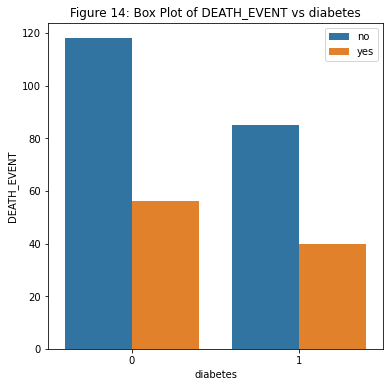

In [28]:
plt.figure(figsize=(6,6))
sns.countplot(x='diabetes',hue='DEATH_EVENT',data=df)
plt.ylabel('DEATH_EVENT')
plt.legend(['no','yes'])
plt.title("Figure 14: Box Plot of DEATH_EVENT vs diabetes")
plt.show()

<Figure size 504x360 with 0 Axes>

Text(0.5, 1.0, 'Figure 14: Box Plot of serum_sodium vs time')

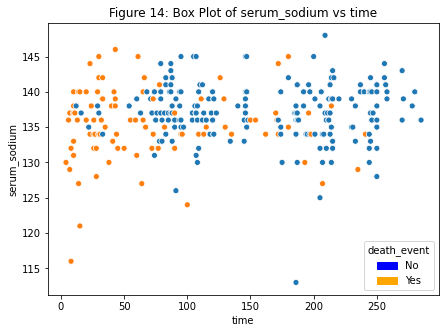

In [29]:
plt.figure(figsize=(7,5))
blue_patch = mpatches.Patch(color='blue', label='No')
orange_patch = mpatches.Patch(color='orange', label='Yes')
plt.title("Figure 14: Box Plot of serum_sodium vs time")
sns.scatterplot(x = "time", y = "serum_sodium", data = df[["serum_sodium", "time", "DEATH_EVENT"]], hue = "DEATH_EVENT");
plt.legend(handles=[blue_patch, orange_patch], loc='lower right', title='death_event')

<Figure size 504x504 with 0 Axes>

Text(0.5, 1.0, 'Figure 15: Boxplot of serum_creatinine by DEATH_EVENT')

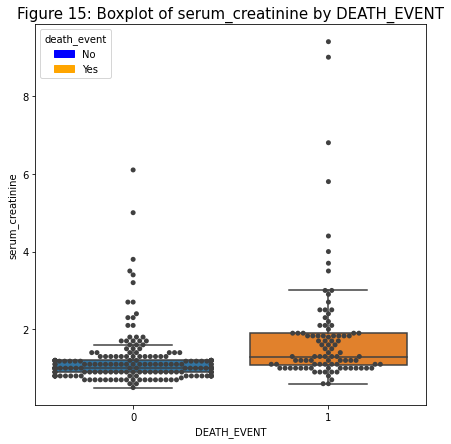

In [30]:
plt.figure(figsize=(7,7))
sns.boxplot(y="serum_creatinine", x="DEATH_EVENT", data=df,showfliers = False)
sns.swarmplot(y='serum_creatinine',x='DEATH_EVENT', data=df, color=".25")
blue_patch = mpatches.Patch(color='blue', label='No')
orange_patch = mpatches.Patch(color='orange', label='Yes')
plt.legend(handles=[blue_patch, orange_patch], title='death_event', loc='upper left')
plt.title('Figure 15: Boxplot of serum_creatinine by DEATH_EVENT', fontsize=15)
plt.show()

<Figure size 504x360 with 0 Axes>

Text(0.5, 1.0, 'Figure 16: Scatterplot of age and creatinine phosphokinase')

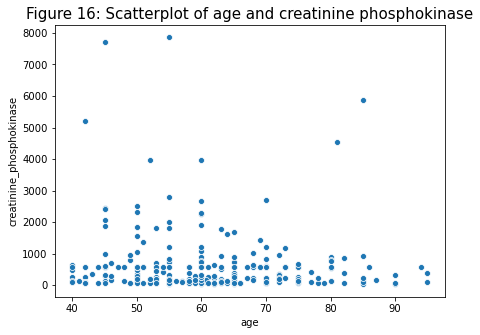

In [31]:
plt.figure(figsize=(7,5))
sns.scatterplot("age", "creatinine_phosphokinase", data=df)
plt.title('Figure 16: Scatterplot of age and creatinine phosphokinase', fontsize=15)
plt.show()

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'Figure 4: Boxplot of Serum creatinine')

(0.1, 5.0)

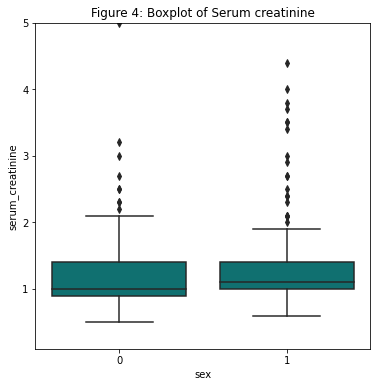

count    299.00000
mean       1.39388
std        1.03451
min        0.50000
25%        0.90000
50%        1.10000
75%        1.40000
max        9.40000
Name: serum_creatinine, dtype: float64

In [32]:
# Boxplot for serum creatinine
plt.figure(figsize=(6,6))
sns.boxplot(x=df.sex, y=df.serum_creatinine, color = 'teal')
plt.title("Figure 4: Boxplot of Serum creatinine")
plt.ylim(0.1,5)
plt.show()
df['serum_creatinine'].describe()

<Figure size 504x504 with 0 Axes>

Text(0.5, 1.0, 'Figure 15: Boxplot of DEATH_EVENT vs Age')

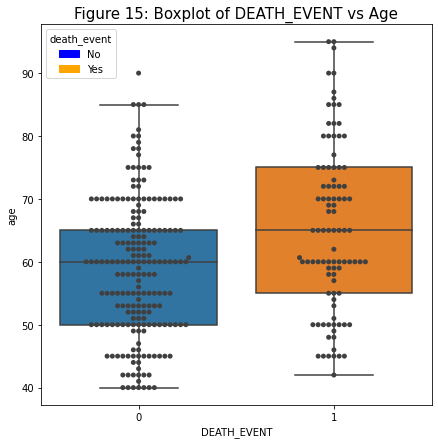

In [33]:
 plt.figure(figsize=(7,7))
sns.boxplot(y="age", x="DEATH_EVENT", data=df,showfliers = False)
sns.swarmplot(y='age',x='DEATH_EVENT', data=df, color=".25")
blue_patch = mpatches.Patch(color='blue', label='No')
orange_patch = mpatches.Patch(color='orange', label='Yes')
plt.legend(handles=[blue_patch, orange_patch], title='death_event', loc='upper left')
plt.title('Figure 15: Boxplot of DEATH_EVENT vs Age', fontsize=15)
plt.show()

Text(0, 0.5, 'age')

Text(0.5, 0, 'platelets')

Text(0.5, 1.0, 'Figure 17: Box Plot of platelets grouped by sex')

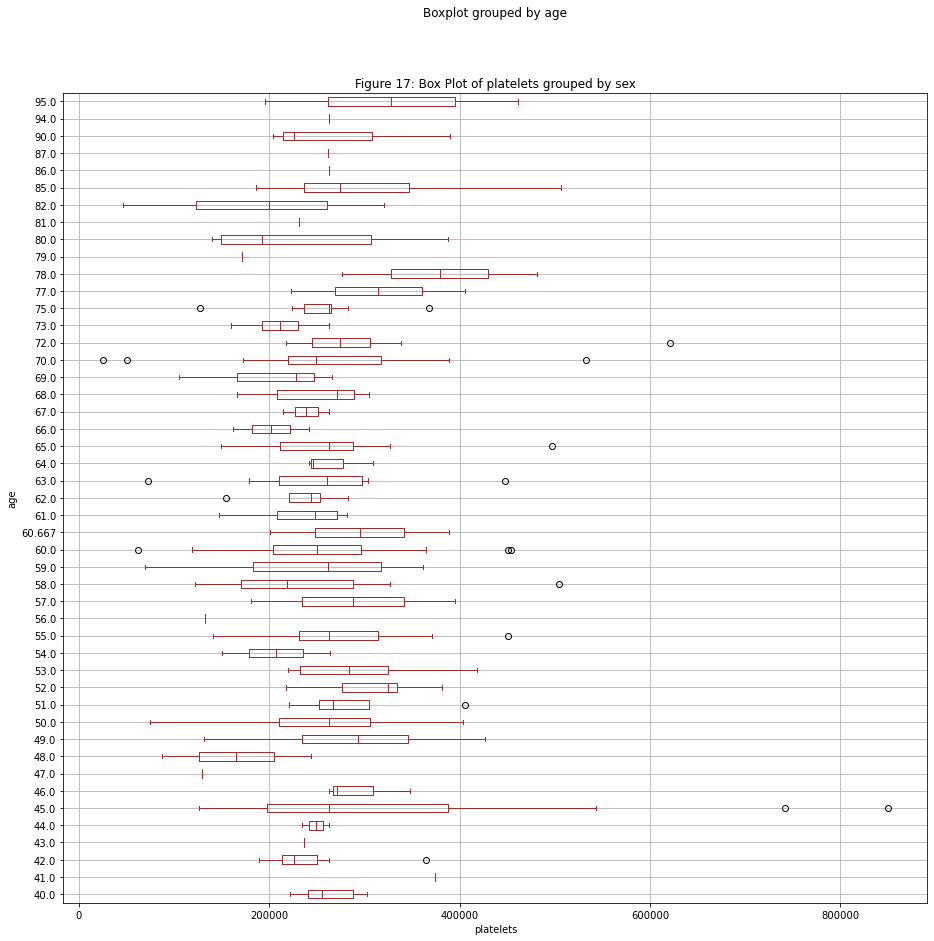

In [34]:
df.dropna().boxplot(column='platelets',by='age',vert=False,figsize=(15,15),color='brown')
plt.ylabel("age")
plt.xlabel("platelets")
plt.title("Figure 17: Box Plot of platelets grouped by sex")
plt.show()

In [35]:
  # sns.pairplot(df, hue='DEATH_EVENT')
# # blue_patch = mpatches.Patch(color='blue', label='No')
# # orange_patch = mpatches.Patch(color='orange', label='Yes')
# # plt.legend(handles=[blue_patch, orange_patch], title='death_event')
# plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000167E19C7AF0>,
      dtype=object)

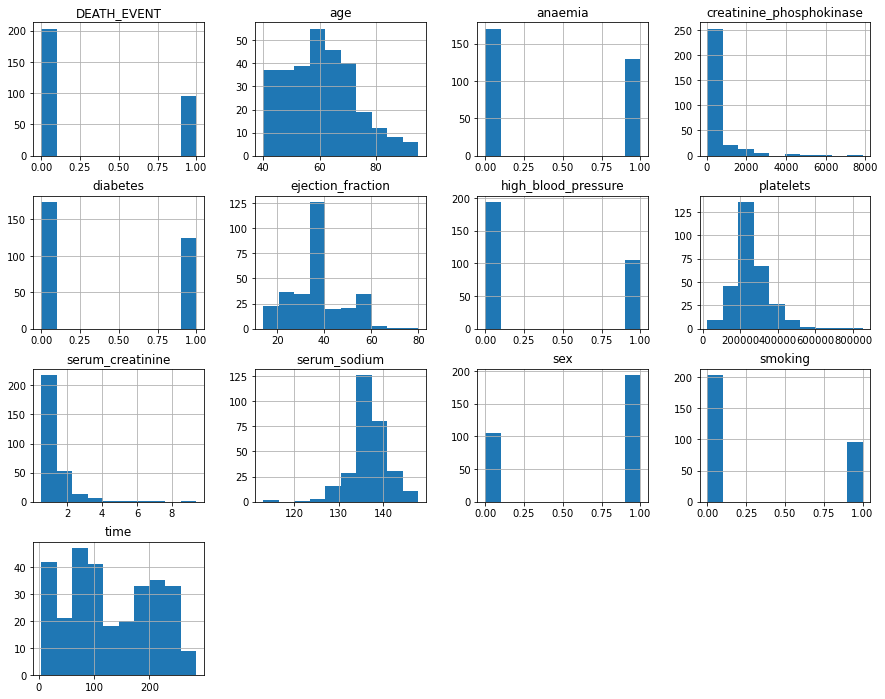

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000167E2165100>,
      dtype=object)

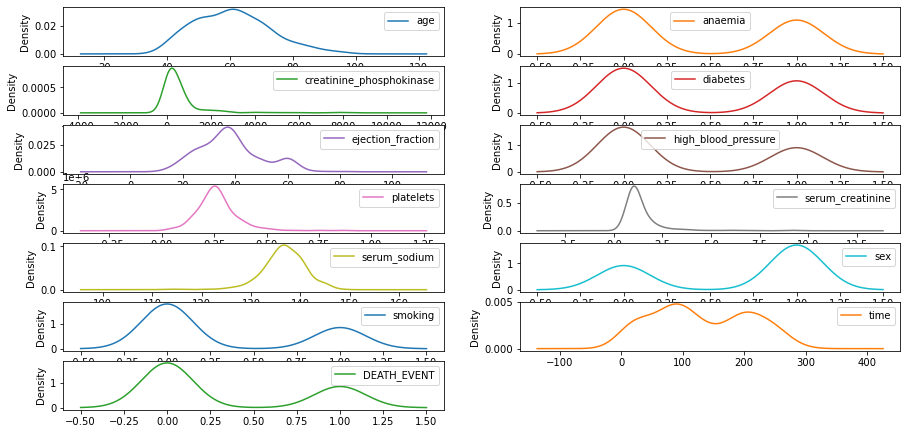

In [36]:
df.hist(bins=10, figsize=(15,12))
plt.show()

df.plot(kind='density', subplots=True, layout=(14,2), sharex=False,figsize=(15,15))
plt.show()

#### Figure's : pair plot of all of the numeric features.

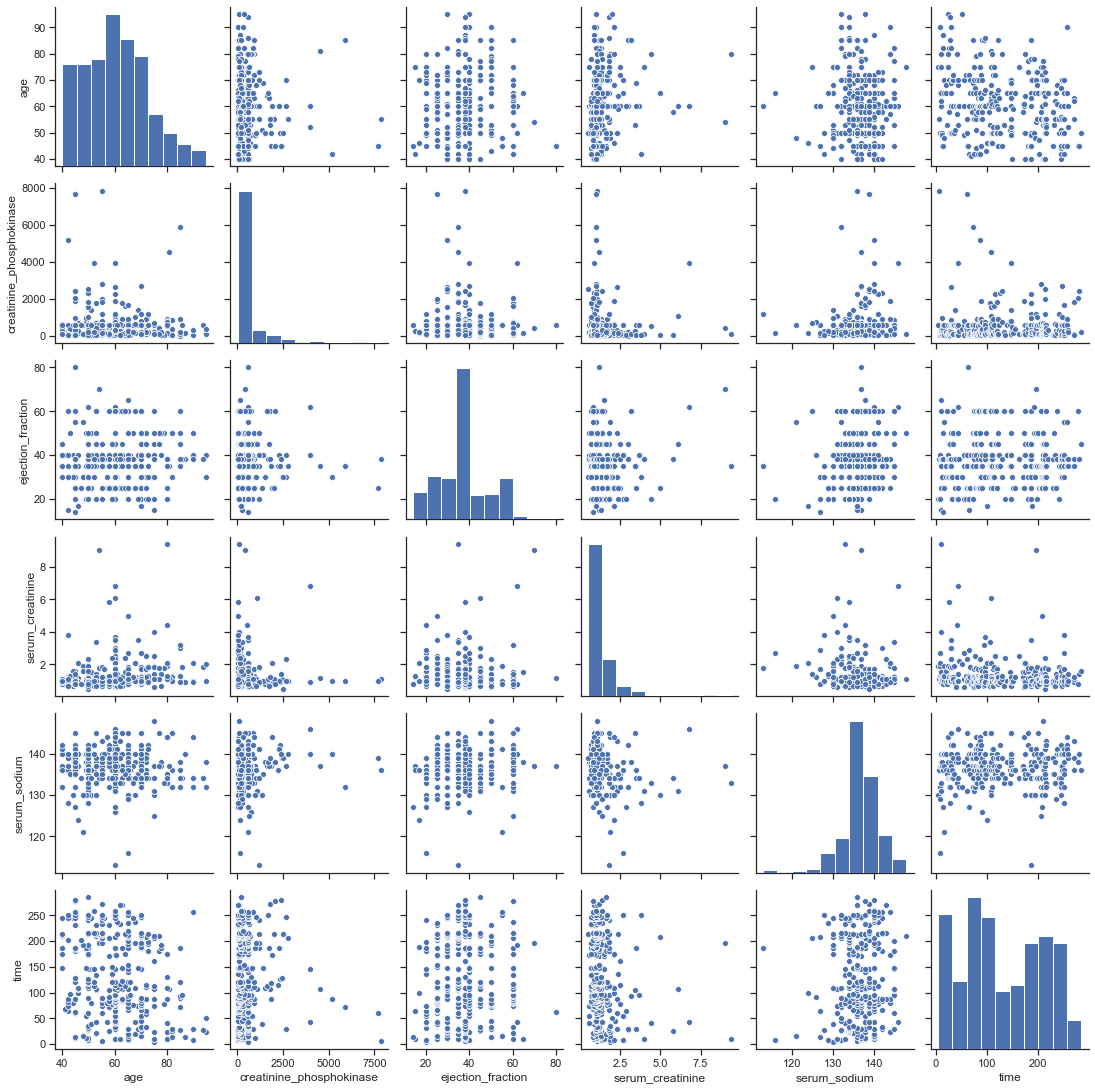

In [37]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,10)
sns.set(style="ticks", color_codes = True)

sns.pairplot(df, vars = ['age','creatinine_phosphokinase','ejection_fraction','serum_creatinine','serum_sodium','time'])
plt.show()

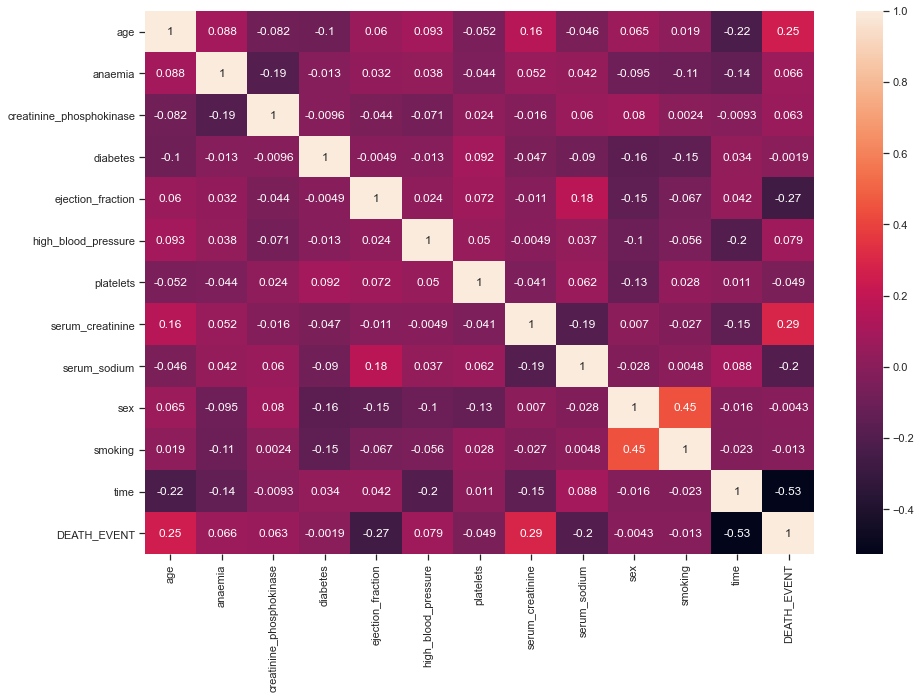

In [38]:
#heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2g');

### Separate the target values:

In [39]:
from sklearn import preprocessing 

target = df.DEATH_EVENT
data = df.drop(columns = "DEATH_EVENT")

### **Data Modelling**

Splitting the dataset into the Traning set and Test set. 75% of dataset for training set, 25% for test set.

First we work on the given data normally and we do classification without using any algorithm and see the result , futher we then use the hill climbing algorithm and then select the important features and only work on them and observe if we get any better result compared to when we just work on with all the featrures.

### Base model without any

K Nearest Neighbour:

In [40]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.25, random_state = 5)
X_train.head()
X_train.shape
X_test.head()
X_test.shape

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
37,82.0,1,855,1,50,1,321000.0,1.0,145,0,0,30
88,44.0,0,84,1,40,1,235000.0,0.7,139,1,0,79
156,52.0,1,58,0,35,0,277000.0,1.4,136,0,0,120
71,58.0,0,582,1,35,0,122000.0,0.9,139,1,1,71
18,70.0,1,125,0,25,1,237000.0,1.0,140,0,0,15


(224, 12)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
198,50.0,1,582,1,20,1,279000.00,1.00,134,0,0,186
66,42.0,1,250,1,15,0,213000.00,1.30,136,0,0,65
24,75.0,0,582,1,30,1,263358.03,1.83,134,0,0,23
102,80.0,0,898,0,25,0,149000.00,1.10,144,1,1,87
264,61.0,0,582,1,38,0,147000.00,1.20,141,1,0,237


(75, 12)

In [41]:
clf = KNeighborsClassifier(n_neighbors=5)
fit = clf.fit(X_train, y_train)

y_pred = fit.predict(X_test)
y_pred.shape

(75,)

In [42]:
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[41 12]
 [21  1]]


<Figure size 720x504 with 0 Axes>

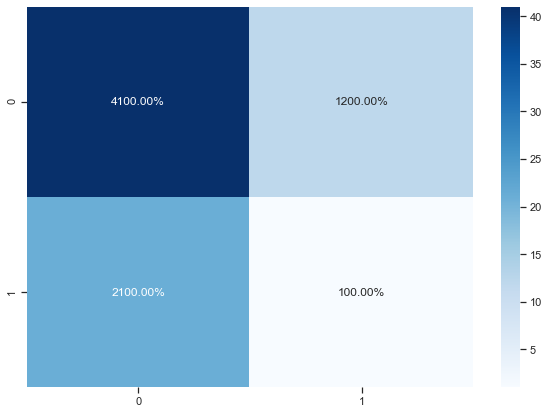

In [43]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True,fmt='.2%', cmap='Blues')

In [44]:
# classification error

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Classification Error: ", 1 - metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.56
Classification Error:  0.43999999999999995


In [45]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71        53
           1       0.08      0.05      0.06        22

    accuracy                           0.56        75
   macro avg       0.37      0.41      0.39        75
weighted avg       0.49      0.56      0.52        75



Decision Tree:

In [46]:
clf = DecisionTreeClassifier(max_depth = 5)

clf = clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)

print (confidence)

y_pred = clf.predict(X_test)



0.8266666666666667


In [47]:
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[48  5]
 [ 8 14]]


In [48]:
# classification error

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Classification Error: ", 1 - metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8266666666666667
Classification Error:  0.17333333333333334


In [49]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88        53
           1       0.74      0.64      0.68        22

    accuracy                           0.83        75
   macro avg       0.80      0.77      0.78        75
weighted avg       0.82      0.83      0.82        75



## Main model with Hill climbing,Hyperparameter tuning and K fold cross validation:

**Now we bacically use Hill climbing algorithm to make our model even more efficient:**

**Selecting Features with Hillclimbing Technique**

In [50]:
from sklearn.utils import shuffle

In [51]:
new_Ind = []
cur_MaxScore = 0.0
col_num = 12

In [52]:
 col_Ind_Random = shuffle(range(0,col_num), random_state=5)

In [53]:
for cur_f in range(0, col_num):
  new_Ind.append(col_Ind_Random[cur_f])
  print(new_Ind)
  newData =data.values[:, new_Ind]
  X_train, X_test, y_train, y_test = train_test_split(newData,target, test_size=0.25, random_state=5)
  clf = KNeighborsClassifier(5, weights='distance', p=1)
  fit = clf.fit(X_train, y_train)
  cur_Score = clf.score(X_test, y_test)
  if cur_Score < cur_MaxScore:
    new_Ind.remove(col_Ind_Random[cur_f])
  else:
    cur_MaxScore = cur_Score
    print("Score with " + str(len(new_Ind)) + " selectedfeatures: " + str(cur_Score))

[7]
Score with 1 selectedfeatures: 0.6266666666666667
[7, 5]
Score with 2 selectedfeatures: 0.64
[7, 5, 2]
[7, 5, 9]
Score with 3 selectedfeatures: 0.6533333333333333
[7, 5, 9, 11]
Score with 4 selectedfeatures: 0.8133333333333334
[7, 5, 9, 11, 4]
Score with 5 selectedfeatures: 0.8266666666666667
[7, 5, 9, 11, 4, 8]
Score with 6 selectedfeatures: 0.8533333333333334
[7, 5, 9, 11, 4, 8, 1]
Score with 7 selectedfeatures: 0.8533333333333334
[7, 5, 9, 11, 4, 8, 1, 0]
Score with 8 selectedfeatures: 0.8533333333333334
[7, 5, 9, 11, 4, 8, 1, 0, 10]
[7, 5, 9, 11, 4, 8, 1, 0, 6]
[7, 5, 9, 11, 4, 8, 1, 0, 3]
Score with 9 selectedfeatures: 0.8533333333333334


In [54]:
print("There are " + str(len(new_Ind)) + " features selected:")

There are 9 features selected:


In [55]:
print(new_Ind)

[7, 5, 9, 11, 4, 8, 1, 0, 3]


Here we see the important feature from the hill climbing. The one which are not necessary and will not help us we just drop them.

In [56]:
data_new=data.copy()

In [57]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


Here we drop the features which we did not get from our Hill Climbing Algorithm:

In [58]:
data_new = data_new.drop(['creatinine_phosphokinase','platelets','smoking'],axis=1)

In [59]:
data_new.head()

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,time
0,75.0,0,0,20,1,1.9,130,1,4
1,55.0,0,0,38,0,1.1,136,1,6
2,65.0,0,0,20,0,1.3,129,1,7
3,50.0,1,0,20,0,1.9,137,1,7
4,65.0,1,1,20,0,2.7,116,0,8


**Hyperparameter Tuning:**

In [60]:

k_range = range(1,30)
k_scores = []
results = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    
    scores = cross_val_score(knn, data_new, target, scoring = 'accuracy')
    k_scores.append(scores.mean())
    results.append([k, scores.mean()])
    print("Score with " + str(k) + " Neighbours: " + str(scores.mean()))

Score with 1 Neighbours: 0.5189830508474575
Score with 2 Neighbours: 0.5822598870056497
Score with 3 Neighbours: 0.5855932203389831
Score with 4 Neighbours: 0.6189265536723163
Score with 5 Neighbours: 0.6189265536723164
Score with 6 Neighbours: 0.665593220338983
Score with 7 Neighbours: 0.655593220338983
Score with 8 Neighbours: 0.695593220338983
Score with 9 Neighbours: 0.6889265536723164
Score with 10 Neighbours: 0.7089265536723165
Score with 11 Neighbours: 0.6889265536723164
Score with 12 Neighbours: 0.7322598870056497
Score with 13 Neighbours: 0.7155932203389831
Score with 14 Neighbours: 0.7089265536723165
Score with 15 Neighbours: 0.7155932203389831
Score with 16 Neighbours: 0.7255932203389831
Score with 17 Neighbours: 0.7222598870056498
Score with 18 Neighbours: 0.7389265536723164
Score with 19 Neighbours: 0.7222598870056498
Score with 20 Neighbours: 0.7422598870056497
Score with 21 Neighbours: 0.7289265536723164
Score with 22 Neighbours: 0.7522598870056496
Score with 23 Neighbou

Text(0.5, 0, 'Value of K for KNN')

Text(0, 0.5, 'Cross-Validation Accuracy')

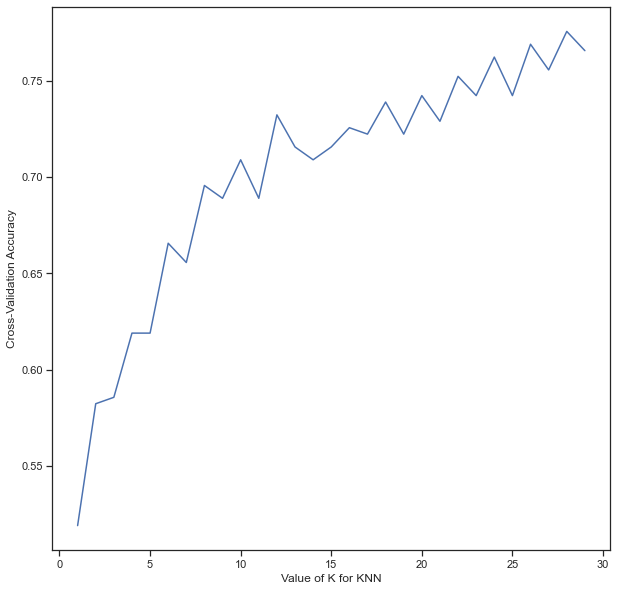

In [61]:
plt.plot(k_range, k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validation Accuracy")

we can observe that the optimal KNN model has a mean score of 0.73 and the best parameter is 12.From the above.

**K Nearest Neighbour:**

In [62]:
X_train, X_test, y_train, y_test = train_test_split(data_new, target, test_size = 0.25, random_state = 5)
X_train.head()
X_train.shape
X_test.head()
X_test.shape

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,time
37,82.0,1,1,50,1,1.0,145,0,30
88,44.0,0,1,40,1,0.7,139,1,79
156,52.0,1,0,35,0,1.4,136,0,120
71,58.0,0,1,35,0,0.9,139,1,71
18,70.0,1,0,25,1,1.0,140,0,15


(224, 9)

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,time
198,50.0,1,1,20,1,1.00,134,0,186
66,42.0,1,1,15,0,1.30,136,0,65
24,75.0,0,1,30,1,1.83,134,0,23
102,80.0,0,0,25,0,1.10,144,1,87
264,61.0,0,1,38,0,1.20,141,1,237


(75, 9)

In [63]:
clf = KNeighborsClassifier(n_neighbors=12,algorithm='auto', leaf_size=50, metric='minkowski',
           metric_params=None, p=1,
           weights='distance')

In [64]:
#set KFlod cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=19, shuffle=True)

In [65]:
for k, (train_index, test_index) in enumerate(kf.split(X_train)):
 
    #X_train, X_test = X_train.iloc[train_index], X_test.iloc[test_index]
    #y_train, y_test = y_train.iloc[train_index], y_test.iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_train, y_train)))

KNeighborsClassifier(leaf_size=50, n_neighbors=12, p=1, weights='distance')

[fold 0] score: 1.00000


KNeighborsClassifier(leaf_size=50, n_neighbors=12, p=1, weights='distance')

[fold 1] score: 1.00000


KNeighborsClassifier(leaf_size=50, n_neighbors=12, p=1, weights='distance')

[fold 2] score: 1.00000


KNeighborsClassifier(leaf_size=50, n_neighbors=12, p=1, weights='distance')

[fold 3] score: 1.00000


KNeighborsClassifier(leaf_size=50, n_neighbors=12, p=1, weights='distance')

[fold 4] score: 1.00000


In [66]:
y_pre = clf.predict(X_test)
y_pre.shape

(75,)

In [67]:
cm = confusion_matrix(y_test, y_pre)
print (cm)

[[51  2]
 [ 9 13]]


<Figure size 720x504 with 0 Axes>

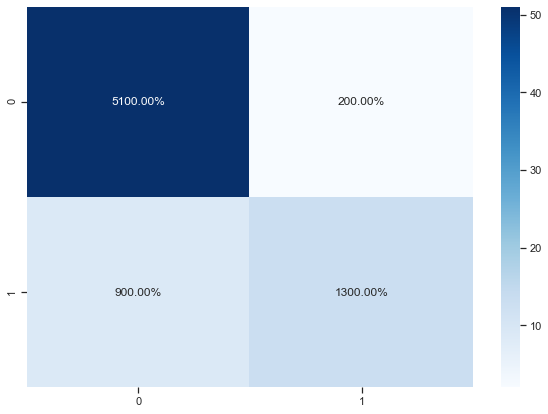

In [68]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True,fmt='.2%', cmap='Blues')

In [69]:
# Accuracy and classification error:

print("Accuracy: ", metrics.accuracy_score(y_test, y_pre))
print("Classification Error: ", 1 - metrics.accuracy_score(y_test, y_pre))

Accuracy:  0.8533333333333334
Classification Error:  0.1466666666666666


In [70]:
print (classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        53
           1       0.87      0.59      0.70        22

    accuracy                           0.85        75
   macro avg       0.86      0.78      0.80        75
weighted avg       0.85      0.85      0.84        75



**DECISION TREE**

In [71]:
X_train, X_test, y_train, y_test =train_test_split(data_new,target,test_size=0.25,random_state=5)
X_train.head()
X_train.shape
X_test.head()
X_test.shape

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,time
37,82.0,1,1,50,1,1.0,145,0,30
88,44.0,0,1,40,1,0.7,139,1,79
156,52.0,1,0,35,0,1.4,136,0,120
71,58.0,0,1,35,0,0.9,139,1,71
18,70.0,1,0,25,1,1.0,140,0,15


(224, 9)

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,time
198,50.0,1,1,20,1,1.00,134,0,186
66,42.0,1,1,15,0,1.30,136,0,65
24,75.0,0,1,30,1,1.83,134,0,23
102,80.0,0,0,25,0,1.10,144,1,87
264,61.0,0,1,38,0,1.20,141,1,237


(75, 9)

In [72]:
clf = DecisionTreeClassifier(criterion='gini',max_depth = 5,random_state=5,min_samples_split=4)

In [73]:
#set KFlod cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=19, shuffle=True)

In [74]:
for k, (train_index, test_index) in enumerate(kf.split(X_train)):
 
    #X_train, X_test = X_train.iloc[train_index], X_test.iloc[test_index]
    #y_train, y_test = y_train.iloc[train_index], y_test.iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_train, y_train)))

DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=5)

[fold 0] score: 0.92411


DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=5)

[fold 1] score: 0.92411


DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=5)

[fold 2] score: 0.92411


DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=5)

[fold 3] score: 0.92411


DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=5)

[fold 4] score: 0.92411


In [75]:
ypre = clf.predict(X_test)
ypre.shape

(75,)

In [76]:
cm = confusion_matrix(y_test, ypre)
print (cm)

[[47  6]
 [ 8 14]]


<Figure size 720x504 with 0 Axes>

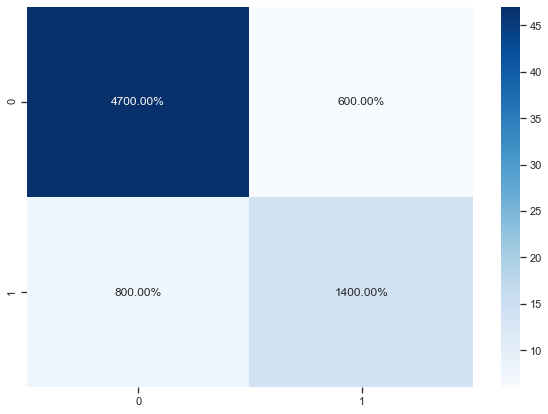

In [77]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True,fmt='.2%', cmap='Blues')

In [78]:
# Accuracy and classification error

print("Accuracy: ", metrics.accuracy_score(y_test, ypre))
print("Classification Error: ", 1 - metrics.accuracy_score(y_test, ypre))

Accuracy:  0.8133333333333334
Classification Error:  0.18666666666666665


In [79]:
print (classification_report(y_test, ypre))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        53
           1       0.70      0.64      0.67        22

    accuracy                           0.81        75
   macro avg       0.78      0.76      0.77        75
weighted avg       0.81      0.81      0.81        75



The decision tree was visualised using the String Io which worked in google colab. we tried configuring and visualising one shown in the lab sheet unfortunately we couldnt configure. we have also provided the tree as an image in the folder.

In [80]:
# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = data_new.columns.values,class_names=['1','0'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('df.png')
# Image(graph.create_png())